# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv')

In [2]:
df1

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
new_df1 = df1[(df1['Total Claim Amount'] > 1000) & (df1['Response'] == 'Yes')]
print(new_df1)

       Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
189           189  OK31456  California             11009.130490      Yes   
236           236  YJ16163      Oregon             11009.130490      Yes   
419           419  GW43195      Oregon             25807.063000      Yes   
442           442  IP94270     Arizona             13736.132500      Yes   
587           587  FJ28407  California              5619.689084      Yes   
...           ...      ...         ...                      ...      ...   
10351       10351  FN44127      Oregon              3508.569533      Yes   
10373       10373  XZ64172      Oregon             10963.957230      Yes   
10487       10487  IX60941      Oregon              3508.569533      Yes   
10565       10565  QO62792      Oregon              7840.165778      Yes   
10708       10708  CK39096      Oregon              5619.689084      Yes   

       Coverage             Education Effective To Date EmploymentStatus  \
189     Pre

2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [4]:
average_total_claim_amount = df1.groupby(['Policy Type', 'Gender'])['Total Claim Amount'].mean()
print(average_total_claim_amount)

Policy Type     Gender
Corporate Auto  F         397.799287
                M         462.223565
Personal Auto   F         413.239658
                M         459.919476
Special Auto    F         458.139623
                M         420.355202
Name: Total Claim Amount, dtype: float64


3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [5]:
total_number_of_customers = df1.groupby('State').size()
print(total_number_of_customers)

State
Arizona       1937
California    3552
Nevada         993
Oregon        2909
Washington     888
dtype: int64


In [6]:
number_of_customers_higher_than_500 = total_number_of_customers[total_number_of_customers > 500]
print(number_of_customers_higher_than_500)

State
Arizona       1937
California    3552
Nevada         993
Oregon        2909
Washington     888
dtype: int64


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [7]:
summarized_customer_lifetime_value = df1.groupby(['Education','Gender'])['Customer Lifetime Value'].describe()
print(summarized_customer_lifetime_value)

                              count         mean          std          min  \
Education            Gender                                                  
Bachelor             F       1700.0  7874.269478  6614.107319  1904.000852   
                     M       1572.0  7703.601675  6658.460774  1898.007675   
College              F       1608.0  7748.823325  6678.304057  1898.683686   
                     M       1596.0  8052.459288  6716.960507  1918.119700   
Doctor               F        200.0  7328.508916  6930.556300  2395.570000   
                     M        201.0  7415.333638  5460.941400  2267.604038   
High School or Below F       1590.0  8675.220201  7497.848501  2144.921535   
                     M       1556.0  8149.687783  7190.619899  1940.981221   
Master               F        475.0  8157.053154  6621.774653  2417.777032   
                     M        412.0  8168.832659  7362.156626  2272.307310   

                                     25%          50%          

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

In [8]:
df1

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [9]:
number_of_policies_sold= df1.pivot_table(index='State', columns='Effective To Date', values='Number of Policies', aggfunc='sum')
print(number_of_policies_sold)

Effective To Date  1/1/11  1/10/11  1/11/11  1/12/11  1/13/11  1/14/11  \
State                                                                    
Arizona               139      123       90      101      115       97   
California            180      225      270      155      179      145   
Nevada                 36       41       37       30       59       23   
Oregon                111      215      130       92      110      143   
Washington             84       75       23       36       47       50   

Effective To Date  1/15/11  1/16/11  1/17/11  1/18/11  ...  2/26/11  2/27/11  \
State                                                  ...                     
Arizona                 97       74      124      128  ...      103      110   
California             165      184      162      241  ...      199      193   
Nevada                  45       15       37       61  ...       29       60   
Oregon                 125      133      210      172  ...      145      175   
W

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

In [10]:
grouped_data = df1.groupby(['State', 'Effective To Date'])['Number of Policies'].count().reset_index()

state_totals = grouped_data.groupby('State')['Number of Policies'].sum().reset_index()

top_3_states = state_totals.nlargest(3, 'Number of Policies')['State']

new_df = grouped_data[grouped_data['State'].isin(top_3_states)]

new_df= new_df.sort_values(by='Number of Policies', ascending=False)

print(new_df)

          State Effective To Date  Number of Policies
61   California           1/11/11                  81
78   California           1/27/11                  80
83   California           1/31/11                  80
185      Oregon           1/17/11                  77
115  California            2/7/11                  76
..          ...               ...                 ...
14      Arizona           1/22/11                  21
25      Arizona            1/4/11                  20
20      Arizona           1/28/11                  19
33      Arizona           2/11/11                  19
43      Arizona           2/20/11                  17

[177 rows x 3 columns]


In [11]:
new_df.value_counts()

State       Effective To Date  Number of Policies
Arizona     1/1/11             35                    1
California  1/9/11             57                    1
            2/5/11             55                    1
            2/6/11             62                    1
            2/7/11             76                    1
                                                    ..
            1/11/11            81                    1
            1/12/11            49                    1
            1/13/11            55                    1
            1/14/11            57                    1
Oregon      2/9/11             34                    1
Name: count, Length: 177, dtype: int64

In [12]:
df1

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [13]:
# Lab | Customer Analysis Round 3

In [14]:
#1 - Show DataFrame info.

In [15]:
df2 = pd.read_excel ('marketing_customer_analysis.xlsx')

In [16]:
df2.columns= df2.columns.str.lower()
df2.columns= [col.replace(' ', '_') for col in df2.columns]

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [18]:
#2 - Describe DataFrame.

In [19]:
df2.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [20]:
df2['response'].value_counts()

response
No     7826
Yes    1308
Name: count, dtype: int64

In [21]:
df2['response'].isnull().sum()

0

In [22]:
df2.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [23]:
#3 - Show a plot of the total number of responses.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\franc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


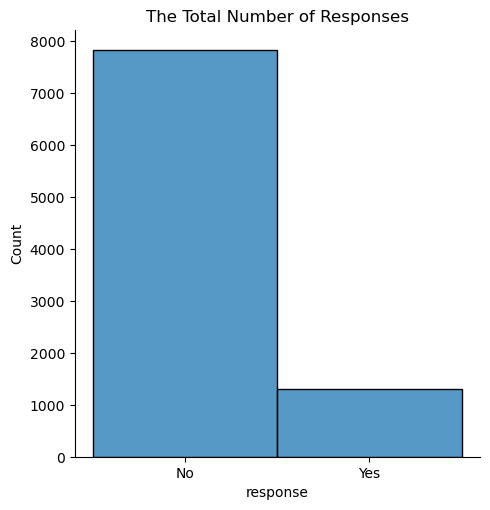

In [25]:
sns.displot(data= df2, x='response')

plt.xlabel('response')
plt.title('The Total Number of Responses')

plt.show()

In [26]:
#4 - Show a plot of the response rate by the sales channel.

In [27]:
print(df2['response'].describe())

count     9134
unique       2
top         No
freq      7826
Name: response, dtype: object


In [28]:
df2['response'].value_counts()

response
No     7826
Yes    1308
Name: count, dtype: int64

In [29]:
print(df2.isnull().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [30]:
grouped_data = df2.groupby('sales_channel')['response']
response_rates = grouped_data.value_counts(normalize=True) * 100

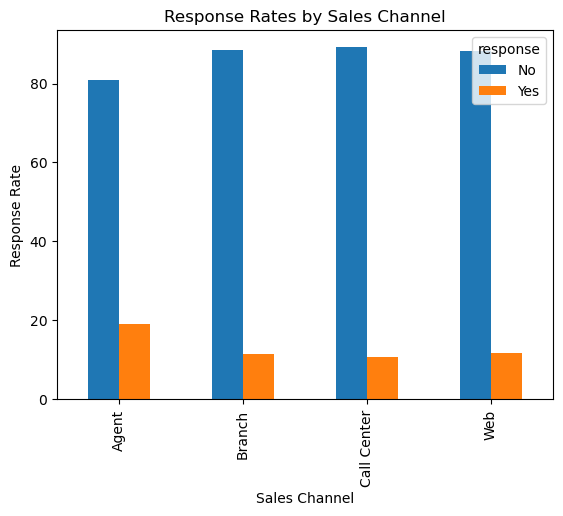

In [31]:
response_rates = response_rates.unstack()
response_rates.plot(kind='bar')

plt.xlabel('Sales Channel')
plt.ylabel('Response Rate')
plt.title('Response Rates by Sales Channel')

plt.show()

In [32]:
#5 - Show a plot of the response rate by the total claim amount.

In [34]:
df2['total_claim_amount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: total_claim_amount
Non-Null Count  Dtype  
--------------  -----  
9134 non-null   float64
dtypes: float64(1)
memory usage: 71.5 KB


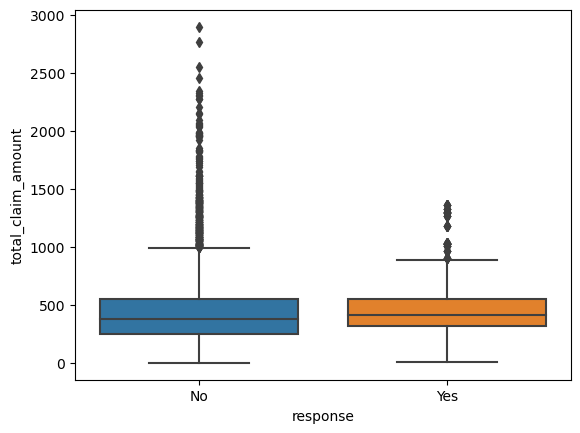

In [35]:
fig,ax=plt.subplots()
sns.boxplot(data=df2,x="response",y="total_claim_amount",ax=ax)
plt.show()

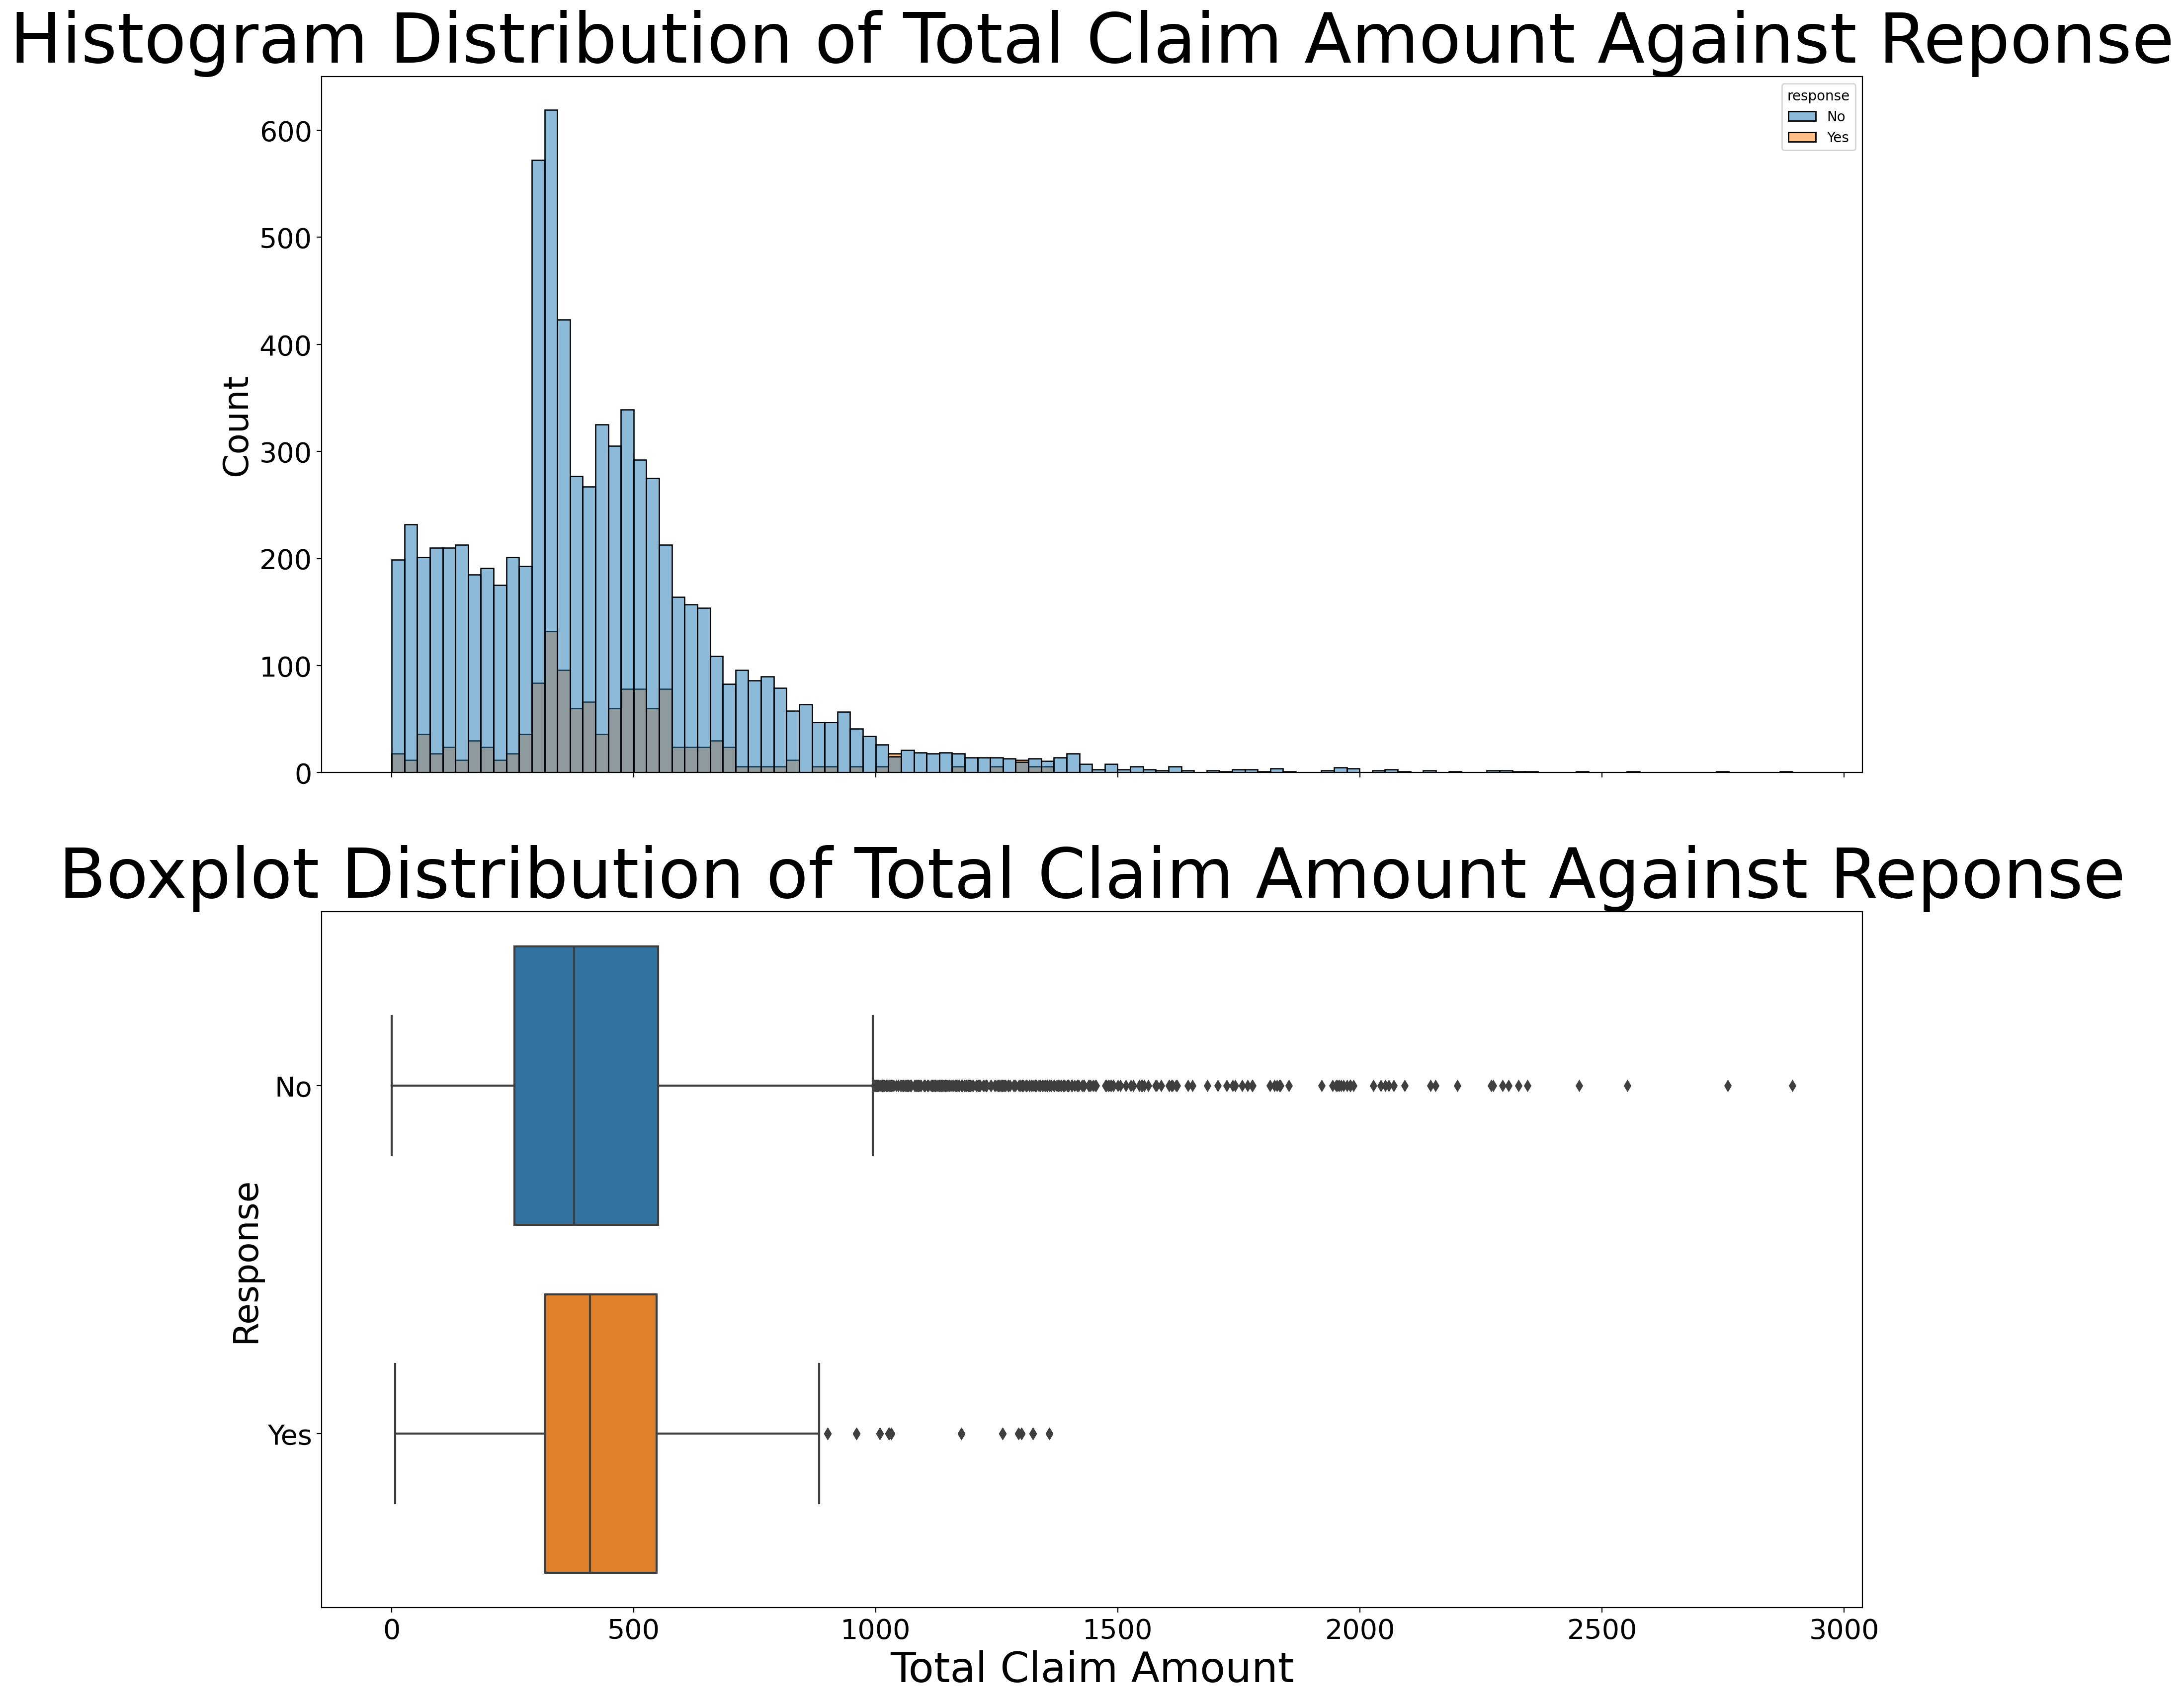

In [39]:
# Histogram and box plot to show distribution between total_claim_amount split by response

fig, ax = plt.subplots(2,1, figsize=(20,20), sharex=True, dpi=200)

a = sns.histplot(data=df2, x='total_claim_amount', hue='response', ax=ax[0])

b = sns.boxplot(data=df2, x='total_claim_amount', y='response', ax=ax[1])

a.axes.set_title("Histogram Distribution of Total Claim Amount Against Reponse",
                 fontsize=50)
a.set_ylabel("Count",fontsize=25)
a.tick_params(labelsize=20)

b.axes.set_title("Boxplot Distribution of Total Claim Amount Against Reponse",fontsize=50)
b.set_xlabel("Total Claim Amount",fontsize=30)
b.set_ylabel("Response",fontsize=25)
b.tick_params(labelsize=20)
plt.show()

In [ ]:
response_rates2 = response_rates2.unstack()

response_rates2.plot(kind='bar', stacked=False)

plt.xlabel('Total Claim Amount')
plt.ylabel('Response Rate')
plt.title('Response Rates by Total Claim Amount')

plt.show()

In [ ]:
sns.histplot(data=data, x=“total_claim_amount", hue="response", bins=10, multiple='dodge')

In [ ]:
#6 - Show a plot of the response rate by income.

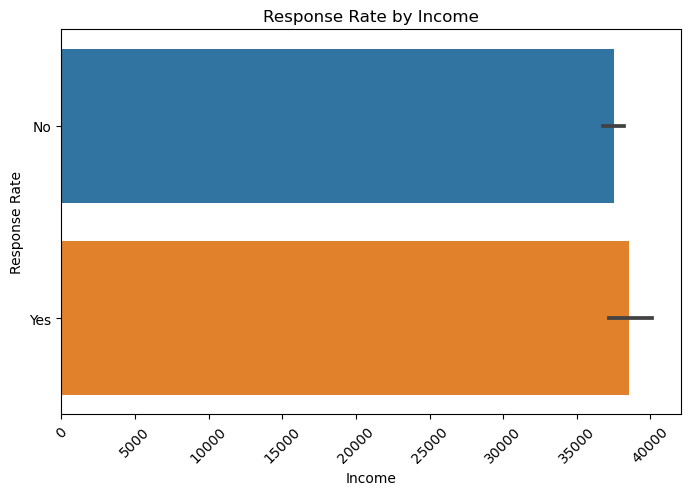

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(x='income', y='response', data=df2)
plt.title('Response Rate by Income')
plt.xlabel('Income')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.show()

In [48]:
df2.shape

(9134, 24)